# 1

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=np.float128)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 4:  
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

In [17]:
x = np.random.random(1024)


In [18]:
start = time.time()
for i in range(10):
    xs  = DFT_slow(x)
end = time.time() - start 
print(end)

0.5501177310943604


In [20]:
start = time.time()
for i in range(10000):
    xf = FFT(x)
end = time.time() - start 
print(end)

53.0555305480957


In [21]:
start = time.time()
for i in range(100):
    xs  = DFT_slow(x)
end = time.time() - start 
print(end)

5.418912172317505


In [22]:
start = time.time()
for i in range(100):
    xf  = FFT(x)
end = time.time() - start 
print(end)

0.531810998916626


# 2

In [44]:
x = np.arange(1000)/1000
y = np.sin(2*np.pi*10*x) + np.sin(2*np.pi*20*x)

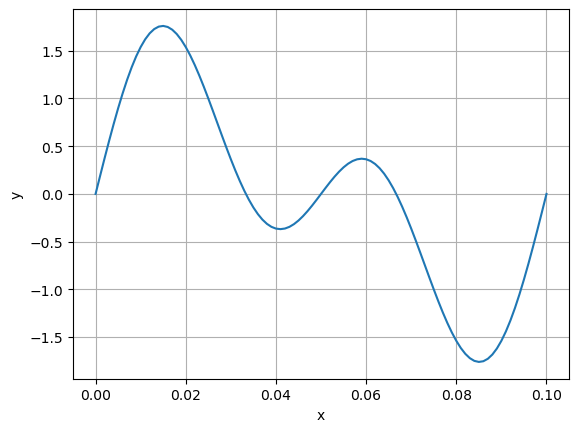

In [45]:
plt.plot(x[:101], y[:101])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

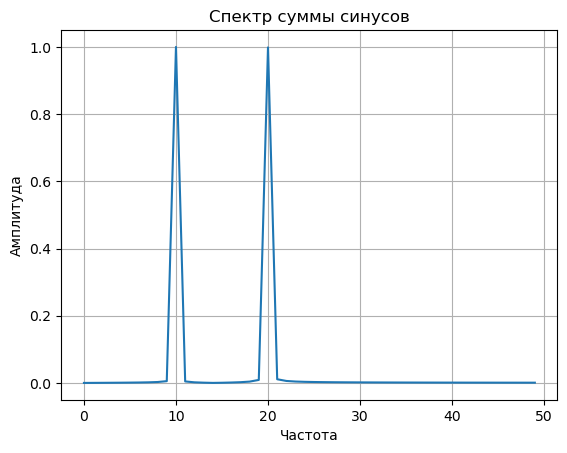

In [79]:
N = 2000
x = np.linspace(0, 1, N)
y = np.sin(2*np.pi*10*x) + np.sin(2*np.pi*20*x)

Y = np.fft.fft(y)
Y_mag = 2*np.abs(Y)/N

freq = np.fft.fftfreq(N, 1/N)

plt.figure()
plt.plot(freq[:50], Y_mag[:50])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Спектр суммы синусов')
plt.grid()
plt.show()

# 3

In [83]:
y1 = np.zeros(40)
y2 = np.zeros(80)

y1[:20] = 5*np.sin(0.1*np.pi*np.arange(20))
y2[:20] = 5*np.sin(0.1*np.pi*np.arange(20))

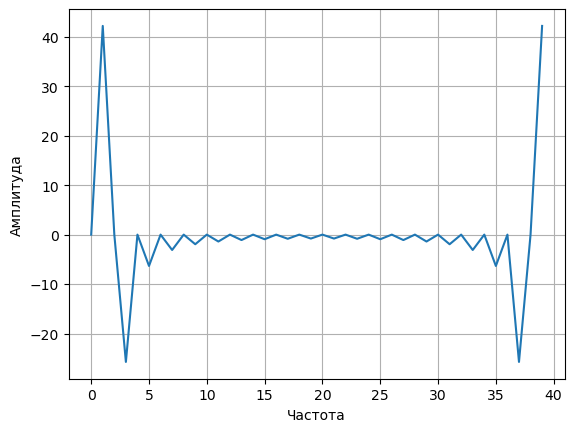

In [88]:
N = 40
Y1 = DFT_slow(y1)

plt.figure()
plt.plot(np.arange(40), Y1)
plt.xlabel('Номер')
plt.ylabel('Модуль')
plt.grid()
plt.show()

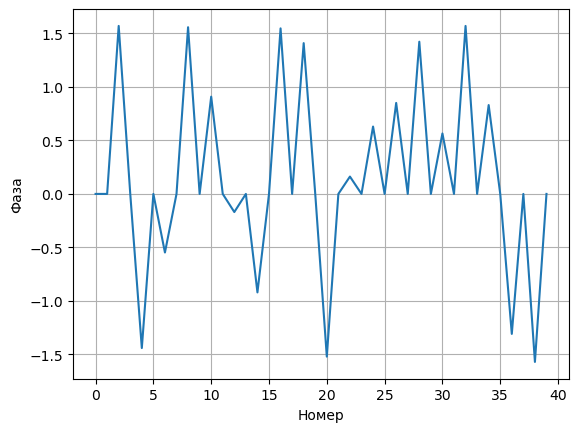

In [93]:
fi1 = np.arctan(Y1.imag/Y1.real)
plt.figure()
plt.plot(np.arange(40), fi1)
plt.xlabel('Номер')
plt.ylabel('Фаза')
plt.grid()
plt.show()

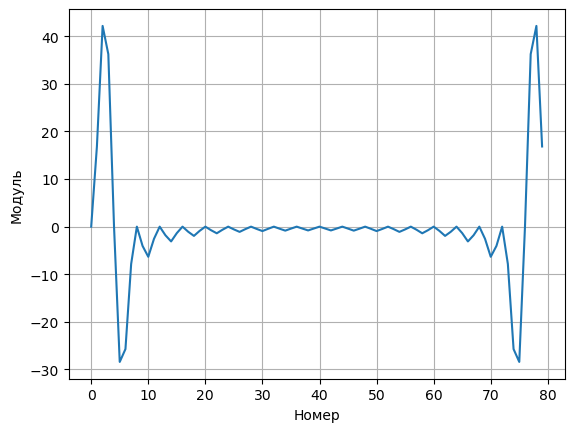

In [96]:
N = 80
Y2 = DFT_slow(y2)
plt.figure()
plt.plot(np.arange(80), Y2)
plt.xlabel('Номер')
plt.ylabel('Модуль')
plt.grid()
plt.show()

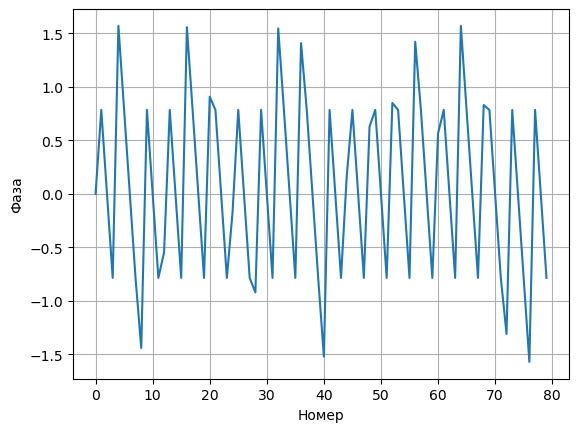

In [94]:
fi2 = np.arctan(Y2.imag/Y2.real)
plt.figure()
plt.plot(np.arange(80), fi2)
plt.xlabel('Номер')
plt.ylabel('Фаза')
plt.grid()
plt.show()